Dataset Features:
           alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


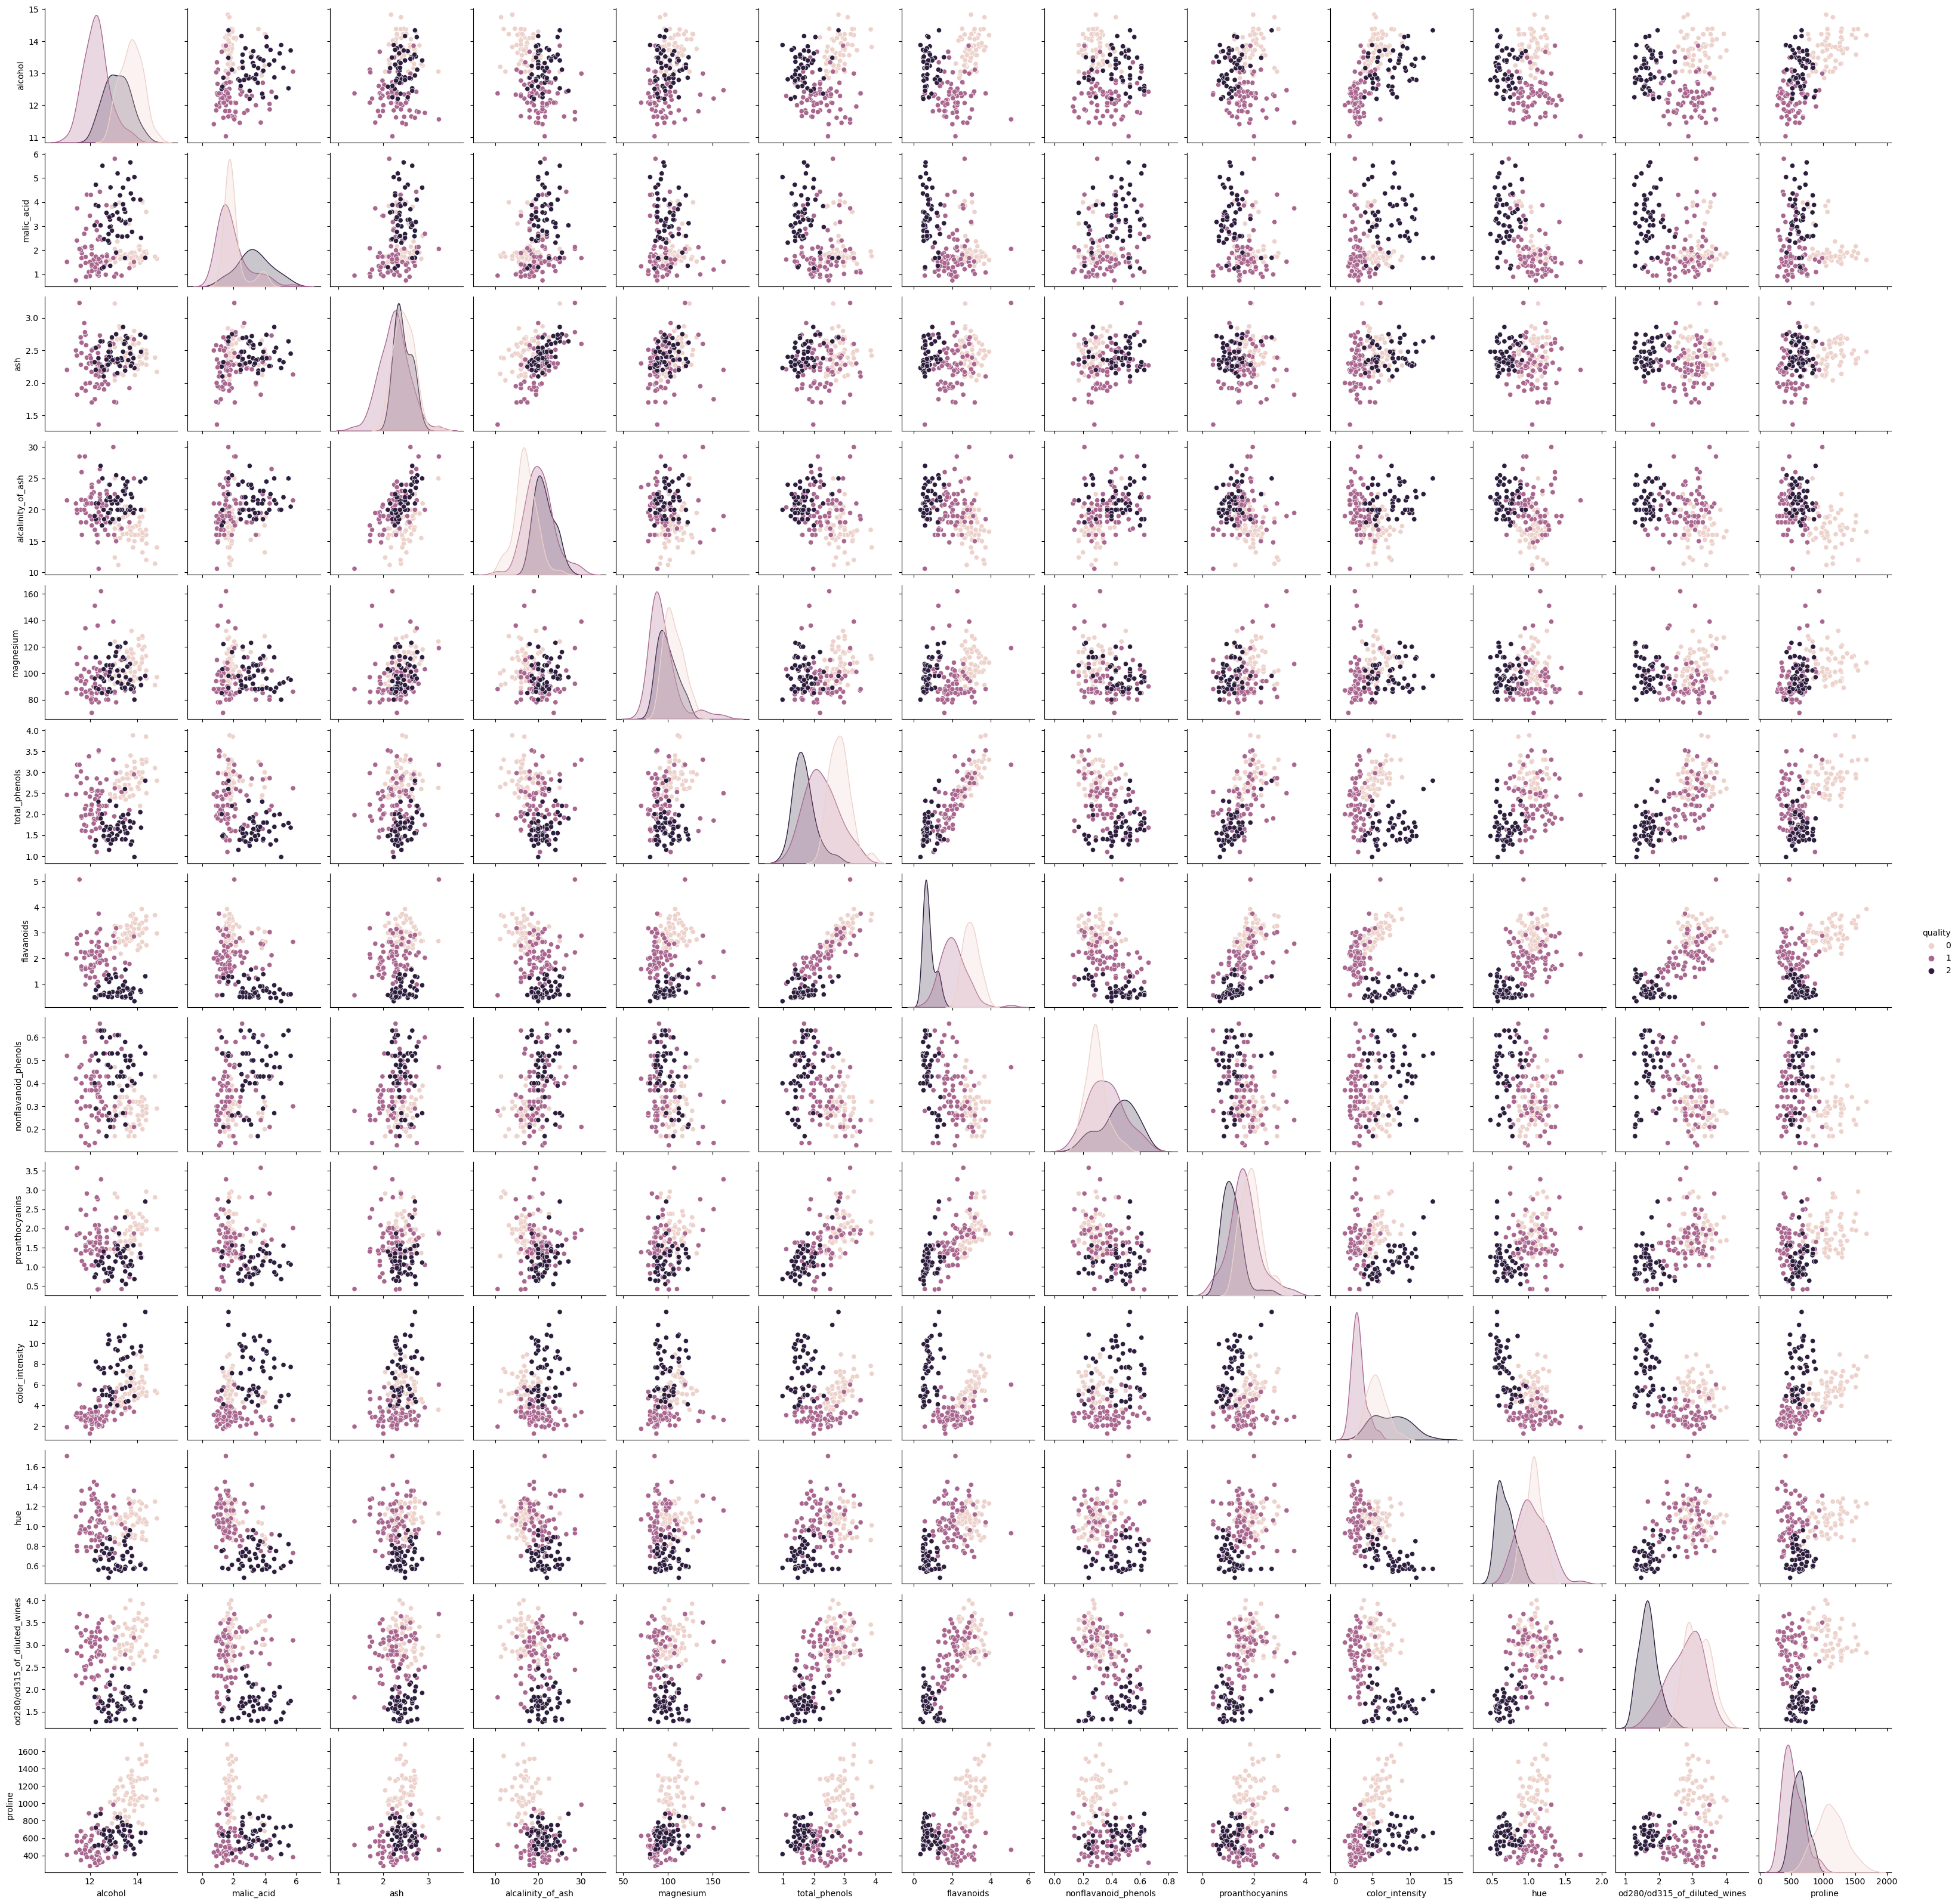

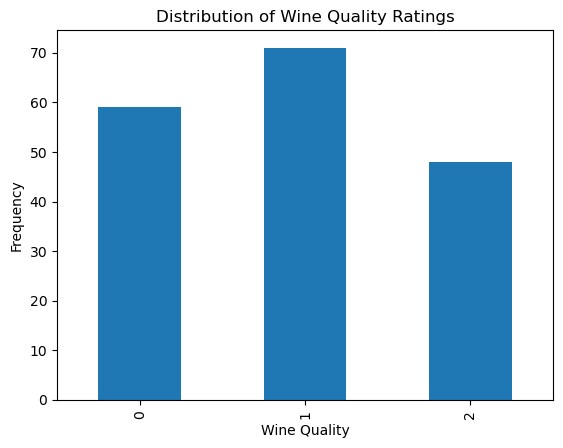

ValueError: The number of classes has to be greater than one; got 1 class

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['quality'] = data.target

print("Dataset Features:\n", df.describe())
sns.pairplot(df, hue='quality')
plt.show()


quality_counts = df['quality'].value_counts().sort_index()
quality_counts.plot(kind='bar')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality Ratings')
plt.show()



df['quality_binary'] = df['quality'].apply(lambda x: 'high quality' if x >= 6 else 'low quality')

X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary'].map({'low quality': 0, 'high quality': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

metrics = {
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_nb), precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_nb), recall_score(y_test, y_pred_svm)],
    'F1 Score': [f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_svm)]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

